In [1]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload
import pyvision ; reload(pyvision)
from pyvision import utils, lesson_functions
%matplotlib inline

test_images_path = 'test_images/'
test_paths = utils.get_images_paths(test_images_path, '*.jpg')

### Load trained model and scaler

In [2]:
from sklearn.externals import joblib
svc = joblib.load('model.pkl')
X_scaler = joblib.load('scaler.pkl')

### Detect objects in test images

In [ ]:
image = utils.get_image('test_images/test1.jpg')
plt.imshow(image);

In [ ]:
### TODO: Tweak these parameters and see how the results change.
color_space = 'LUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 0 # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [400, None] # Min and max in y to search in slide_window()
x_start_stop=[450, None]

# Set in training
colorspace = 'LUV'  # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = 0  # Can be 0, 1, 2, or "ALL"

def find_cars1(image):
    draw_image = np.copy(image)
    # I could use multiple versions of this and concatenate the result
    windows = lesson_functions.slide_window(image, x_start_stop=x_start_stop, y_start_stop=y_start_stop, 
                        xy_window=(150, 150), xy_overlap=(0.5, 0.5))

    hot_windows = lesson_functions.search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)                       

    window_img = lesson_functions.draw_boxes(draw_image, hot_windows, color=(0, 255, 0), thick=4)                    
    return window_img

utils.apply_and_plot(find_cars1, test_paths)

# Use subsampling of HOG features

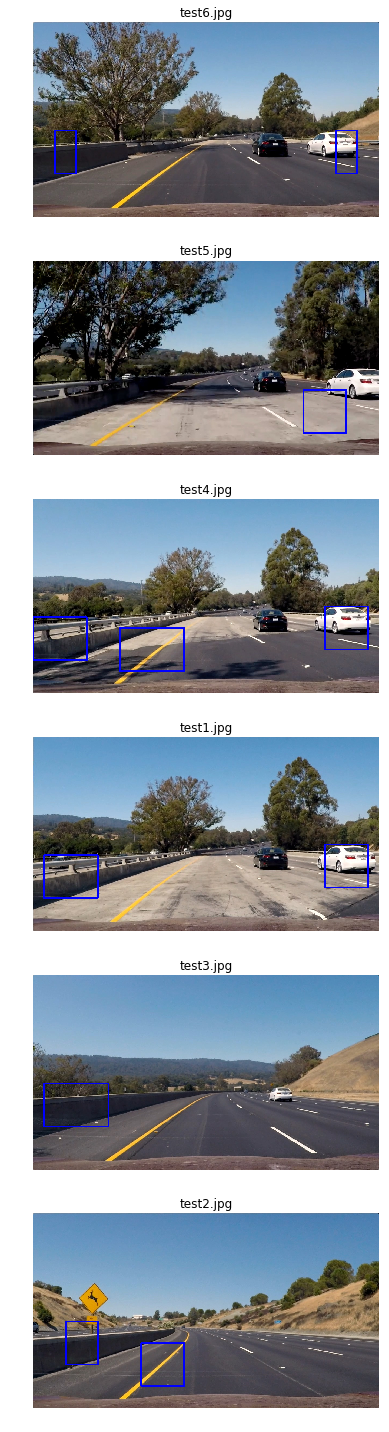

In [3]:
car_finder = lesson_functions.CarFinder(svc, X_scaler, nframes=1)
utils.apply_and_plot(car_finder.pipeline, test_paths)

# Test on video with lane detection

In [ ]:
from moviepy.editor import VideoFileClip
car_finder = lesson_functions.CarFinder(svc, X_scaler, nframes=10)
write_output_path = 'output_video/project_video.mp4'
clip1 = VideoFileClip("project_video.mp4").subclip(0,10)
challange_clip = clip1.fl_image(car_finder.pipeline)
%time challange_clip.write_videofile(write_output_path, audio=False)

[MoviePy] >>>> Building video output_video/project_video.mp4
[MoviePy] Writing video output_video/project_video.mp4


 90%|█████████ | 227/251 [00:54<00:05,  4.08it/s]